In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##ML
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, Normalizer, MaxAbsScaler
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

#import linear regression from sklearn

##Classifiers
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [4]:
##Load thee dataset
df = pd.read_csv('breast-cancer-diagnostic.shuf.lrn.csv')

df.set_index('ID', inplace=True)
df.shape()

FileNotFoundError: [Errno 2] No such file or directory: './breast_small/breast-cancer-diagnostic.shuf.lrn.csv'

<AxesSubplot:xlabel='class', ylabel='count'>

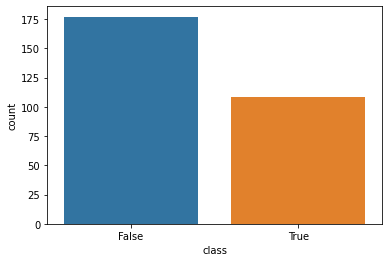

In [ ]:
##Plot the distribution of the target variable
sns.countplot(x='class', data=df)


In [ ]:
# Add every type of SVM classifier to a list
classifiers = [
    SVC(kernel="linear", C=0.001),
    SVC(kernel="linear", C=8),
    SVC(kernel="linear", C=100),
    SVC(gamma=2, C=1),
    SVC(kernel="rbf", C=20),
    SVC(kernel="rbf", C=5),
    SVC(kernel="rbf", C=4),
    SVC(kernel="poly", degree=3, C=0.6),
    SVC(kernel="poly", degree=3, C=0.1),
    SVC(kernel="poly", degree=3, C=1),
    SVC(kernel="poly", degree=2, C=0.6),
    SVC(kernel="poly", degree=4, C=0.6),
    SVC(kernel="poly", C=2),
    SVC(kernel="sigmoid", C=0.6),
    LinearSVC()
]

In [ ]:
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer(), MaxAbsScaler()]

## Data spliting

In [ ]:
##Using the LabelEncoder to convert the categorical data to numerical data
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

## The column 'class' is very unbalanced. Use "Smote" to balance the dataset and have around 30% of the data as 1's
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(df.drop('class', axis=1), df['class'])


# Create y variable with the column 'class'
#y = df['class']
#X = df.drop('class', axis=1)

# Print shape of X and y
print(X.shape)
print(y.shape)



(354, 30)
(354,)


<AxesSubplot:xlabel='class', ylabel='count'>

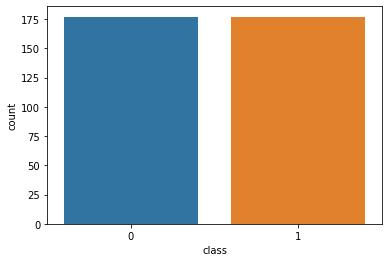

In [ ]:
##Plot the distribution of the target variable
sns.countplot(x=y)


## Model

In [ ]:
#Do CV 5 folds over the classifiers and scalers and print the mean and std of the f1score and confusion matrix
for scaler in scalers:
    X_scaled = scaler.fit_transform(X)
    print(scaler)
    for clf in classifiers:
        scores = cross_validate(clf, X_scaled, y, cv=3, scoring='f1')
        print(clf)
        print("Mean: ", scores['test_score'].mean())
        print("Std: ", scores['test_score'].std())
        print("")

StandardScaler()
SVC(C=0.001, kernel='linear')
Mean:  0.9383790053646512
Std:  0.021218220246399057

SVC(C=8, kernel='linear')
Mean:  0.9583711126274759
Std:  0.005683045893322789

SVC(C=100, kernel='linear')
Mean:  0.9583711126274759
Std:  0.005683045893322789

SVC(C=1, gamma=2)
Mean:  0.49521107733873687
Std:  0.18227039550504673

SVC(C=20)
Mean:  0.9690297768307943
Std:  0.003831384114268091

SVC(C=5)
Mean:  0.9744031830238726
Std:  0.0072734562592617034

SVC(C=4)
Mean:  0.9746282596406713
Std:  0.006366544814750413

SVC(C=0.6, kernel='poly')
Mean:  0.9440147394692849
Std:  0.05599409805209537

SVC(C=0.1, kernel='poly')
Mean:  0.8500370501392474
Std:  0.08208858042275446

SVC(C=1, kernel='poly')
Mean:  0.957327528822856
Std:  0.04264824480911143

SVC(C=0.6, degree=2, kernel='poly')
Mean:  0.611650176100304
Std:  0.07034977342214041

SVC(C=0.6, degree=4, kernel='poly')
Mean:  0.5784661046383127
Std:  0.055425318579224406

SVC(C=2, kernel='poly')
Mean:  0.9564279155188246
Std:  0.0229

## Making predictions

In [ ]:
## Load test data
df_test = pd.read_csv('./breast_small/breast-cancer-diagnostic.shuf.tes.csv')

##make the ID column the index
df_test.set_index('ID', inplace=True)
df_test.head()



,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
ID,,,,,,,,,,,,,,,,,,,,,
884437,10.480,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,...,11.48,29.46,73.68,402.8,0.15150,0.1026,0.1181,0.06736,0.2883,0.07748
901011,11.140,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,0.1690,0.06083,...,12.12,15.82,79.62,453.5,0.08864,0.1256,0.1201,0.03922,0.2576,0.07018
865432,14.500,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.70,15.98,102.80,745.5,0.13130,0.1788,0.2560,0.12210,0.2889,0.08006
894329,9.042,18.90,60.07,244.5,0.09968,0.19720,0.19750,0.04908,0.2330,0.08743,...,10.06,23.40,68.62,297.1,0.12210,0.3748,0.4609,0.11450,0.3135,0.10550
84348301,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300


In [ ]:
#Create X_test taking the whole dataframe
X_test = df_test

##Make a dataframe to store the predictions
df_pred = pd.DataFrame()

##Make predictions with StandardScaler and LogisticRegression
svc = SVC(C=1, kernel='poly')
myScaler = MinMaxScaler()
svc.fit(myScaler.fit_transform(X), y)
pred = svc.predict(myScaler.fit_transform(X_test))
df_pred['class'] = pred
df_pred.index = df_test.index

##Map 0 to False and 1 to True for the column "class"
df_pred['class'] = df_pred['class'].map({0: False, 1: True})


##Save the predictions to a csv file
#df_pred.to_csv('breast-logistic-pred.csv')



In [ ]:
#Print the shape of df_pred 
print(df_pred.shape)
df_pred.tail(30)

##Save the predictions to a csv file
df_pred.to_csv('breast-svm-pred.csv')




(284, 1)
